In [1]:
import sys
import os
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Git_Repositories/GWScripts/load_waveforms/')
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Git_Repositories/GWScripts/pnbmsmapping/')
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/NRPNHybridization/')

In [2]:
import loading
import sxs
import scri
import quaternion
from matplotlib import pyplot as plt
import numpy as np
import h5py
import json
import comcharge
import waveform_utils 
from PYPostNewtonian.Code import PostNewtonian
from scri.asymptotic_bondi_data.map_to_superrest_frame import MT_to_WM, WM_to_MT

In [3]:
# Hi res plots
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize'] = [2.5, 1.2]
# Plot defaults
plt.rcParams['lines.linewidth'] = 0.35
plt.rcParams['grid.linewidth'] = 0.25
plt.rcParams['grid.alpha'] = 0.15
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.labelsize'] = 4
plt.rcParams['ytick.labelsize'] = 4
plt.rcParams['axes.labelsize'] = 4
plt.rcParams['lines.markersize'] = 0.2
plt.rcParams['legend.fontsize'] = 2.5
plt.rcParams['axes.linewidth'] = 0.25
plt.rcParams['xtick.major.size'] = 0.2
plt.rcParams['ytick.major.size'] = 0.2

In [4]:
# Nice font for text
plt.rcParams.update({
    'font.family': 'Liberation Serif',
    'text.usetex': False,
    'mathtext.fontset': 'stix'
})

#mpl.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath}\usepackage{amssymb}"

#set color cycle variable
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

pt = 1./72.27 # Hundreds of years of history... 72.27 points to an inch.

jour_sizes = {"PRD": {"onecol": 246.*pt, "twocol": 510.*pt},
              "CQG": {"onecol": 374.*pt}, # CQG is only one column
              # Add more journals below. Can add more properties to each journal
             }

my_width = jour_sizes["PRD"]["onecol"]
# Our figure's aspect ratio
golden = (1 + 5 ** 0.5) / 2

## CCE Annex waveforms

In [5]:
CCEAnnex_path = "/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/Annex/CCEAnnex/PublicLinks"
SimAnnex_path = "/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/Annex/SimulationAnnex/PublicLinks"
old_method_path = "/home/aniketkhairnar/Desktop/Numerical/Results/Quasicircular/BMSTimephase/old-method"
new_method_path = "/home/aniketkhairnar/Desktop/Numerical/Results/Quasicircular/BMSTimephase/new-method"

file_dir_list = ["SXS:BBH:3928/Lev4", "SXS:BBH:2331/Lev3", "SXS:BBH:2337/Lev3", "SXS:BBH:2115/Lev4",
    "SXS:BBH:2120/Lev4", "SXS:BBH:2124/Lev4", "SXS:BBH:2143/Lev4", "SXS:BBH:2154/Lev4",
    "SXS:BBH:1221/Lev4", "SXS:BBH:1911/Lev3", "SXS:BBH:1942/Lev3", "SXS:BBH:2013/Lev3",
    "SXS:BBH:2374/Lev3", "SXS:BBH:3619/Lev3", "SXS:BBH:2168/Lev3", "SXS:BBH:2225/Lev3",
    "SXS:BBH:1429/Lev3", "SXS:BBH:2677/Lev4", "SXS:BBH:2696/Lev4", "SXS:BBH:4235/Lev4",
]

file_dir = file_dir_list[18]

basepath, Lev = file_dir.rsplit("/Lev",1)

abd_path = f"{CCEAnnex_path}/{basepath}/Lev{Lev}"
abd_old_path = f"{old_method_path}/{basepath}"
abd_new_path = f"{new_method_path}/{basepath}"
metadata_path = f"{SimAnnex_path}/{basepath}/Lev{Lev}"

### ABD data

In [6]:
abd_start, md = loading.load_abd(abd_path, metadata_path)

/home/aniketkhairnar/miniconda3/envs/scri/lib/python3.11/site-packages/sxs/waveforms/format_handlers/rotating_paired_diff_multishuffle_bzip2.py:411: UserWarning: 
Could not find file named '/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/Annex/CCEAnnex/Public/q8_7d_v2/251_CCE/Lev4/metadata.json' or '/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/Annex/CCEAnnex/Public/q8_7d_v2/251_CCE/Lev4/metadata.txt',
but one is expected for this data format.
  warnings.warn(message)
/home/aniketkhairnar/miniconda3/envs/scri/lib/python3.11/site-packages/sxs/waveforms/format_handlers/rotating_paired_diff_multishuffle_bzip2.py:411: UserWarning: 
Could not find file named '/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/Annex/CCEAnnex/Public/q8_7d_v2/251_CCE/Lev4/metadata.json' or '/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/Annex/CCEAnnex/Public/q8_7d_v2/251_CCE/Lev4/metadata.txt',
but one is expected for this data format.
  warnings.warn(message)


In [7]:
h = sxs.load(file_dir).h
md = h.metadata

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [8]:
ref_idx = np.abs(h.t - md.reference_time).argmin()

In [11]:
h_ext = h[ref_idx : h.max_norm_index()]
t_ext = h_ext.t

In [408]:
t_cce = abd_start.t
h_cce = abd_start.h

In [409]:
t0 = 2000

In [410]:
t_ref = md.reference_time 
baset0 = t_ref + t0

In [411]:
idx = np.abs(t_ext - baset0).argmin()
pdt = 550

In [412]:
PNStart, PNEnd = -pdt - 200, pdt + 200

In [413]:
horizonparams = waveform_utils.load_horizons(metadata_path)

In [414]:
h_PN, _ = waveform_utils.generate_target_PN(baset0, *horizonparams, h_ext, PNStart, PNEnd)

In [415]:
t_PN = h_PN.t

In [416]:
hext_21 = h_ext.data[:,h_ext.index(2,1)]
hcce_21 = h_cce.data[:,h_ext.index(2,1)]
hpn_21 = h_PN.data[:,h_ext.index(2,1)]

In [417]:
hext_22 = h_ext.data[:,h_ext.index(2,2)]
hcce_22 = h_cce.data[:,h_ext.index(2,2)]
hpn_22 = h_PN.data[:,h_ext.index(2,2)]

In [374]:
Pdot_ext = MT_to_WM(WM_to_MT(h_ext)).momentum_flux()
Pdot_cce = h_cce.momentum_flux()
Pdot_pn = h_PN.momentum_flux()

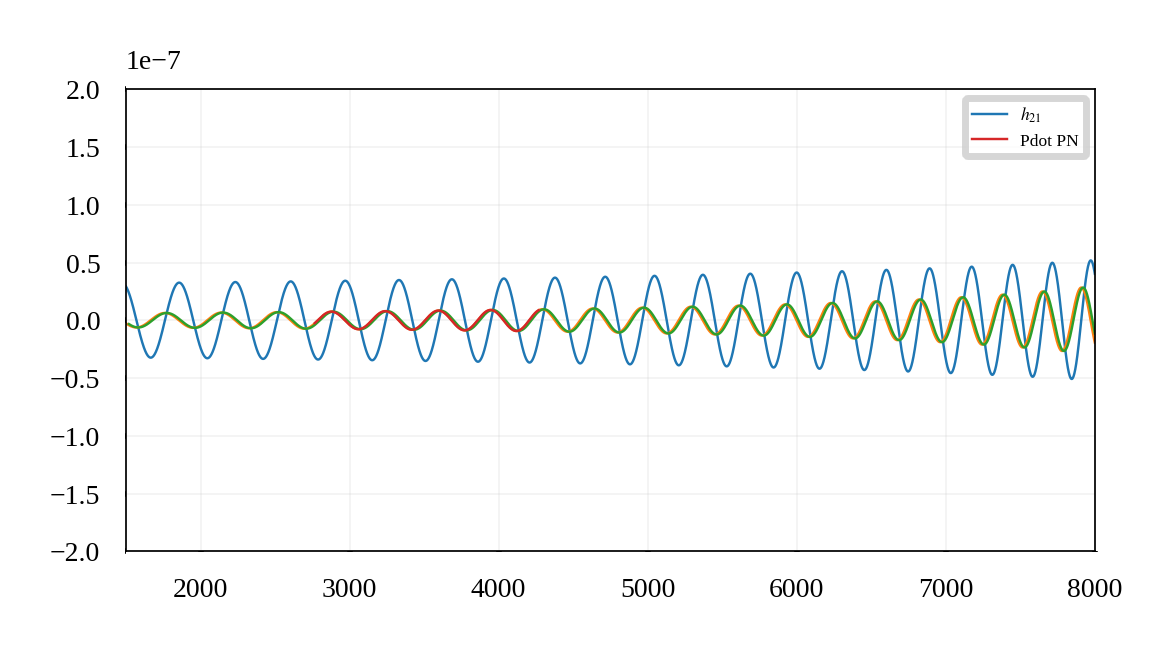

In [375]:
plt.plot(t_ext, 1.e-5*(hext_21).real, label=r'$h_{21}$')
plt.plot(t_ext, (Pdot_ext[:,1] + 1j * Pdot_ext[:,0]).real)
plt.plot(t_cce, (Pdot_cce[:,1] + 1j *Pdot_cce[:,0]).real)
plt.plot(t_PN, (Pdot_pn[:,1] + 1j *Pdot_pn[:,0]).real, label=r'Pdot PN')
plt.xlim(1500,8000)
plt.ylim(-2.e-7, 2.e-7)
plt.legend()
plt.show()

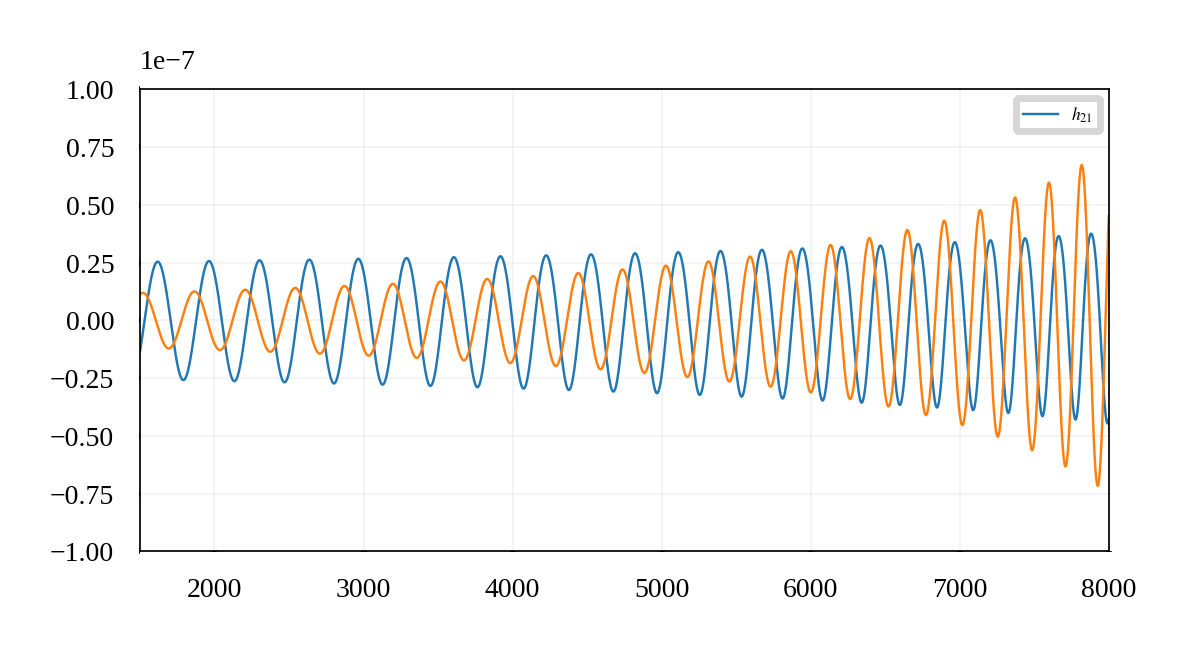

In [114]:
plt.plot(t_cce, 1.e-5*(hcce_21).imag, label=r'$h_{21}$')
plt.plot(t_ext, (Pdot_ext[:,1] + 1j * Pdot_ext[:,0]).imag)
# plt.plot(t_cce, (Pdot_cce[:,1] + 1j *Pdot_cce[:,0]).real)
# plt.plot(t_PN, (Pdot_pn[:,1] + 1j *Pdot_pn[:,0]).real, label=r'Pdot PN')
plt.xlim(1500,8000)
plt.ylim(-1.e-7, 1.e-7)
plt.legend()
plt.show()

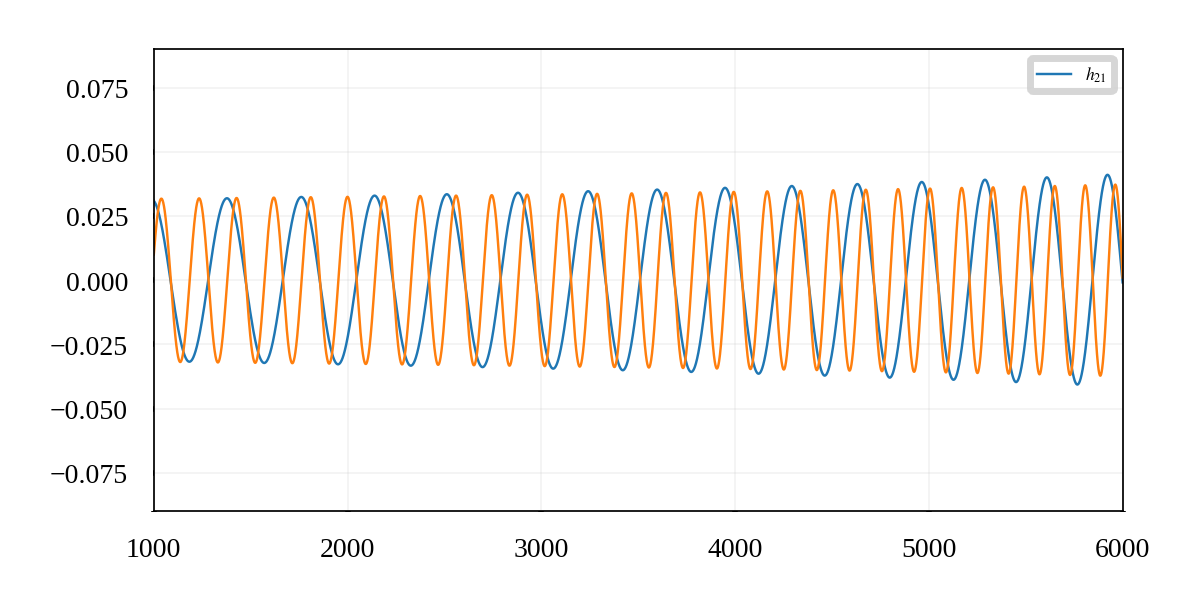

In [388]:
plt.plot(t_ext, 1.e1*hext_21.imag, label = r'$h_{21}$')
plt.plot(t_ext, hext_22.imag)

plt.xlim(1000, 6000)
plt.ylim(-9.e-2, 9.e-2)
plt.legend()

plt.show()

In [ ]:
plt.plot(t, h_21)
# plt.plot(t_new, h_new.data[:,h.index(2,1)])
plt.plot(t, 1.e5 * Pdot_comp)
plt.plot(t, np.zeros(t.shape))
plt.ylim(-1.e-2, 1.e-2)
plt.show()

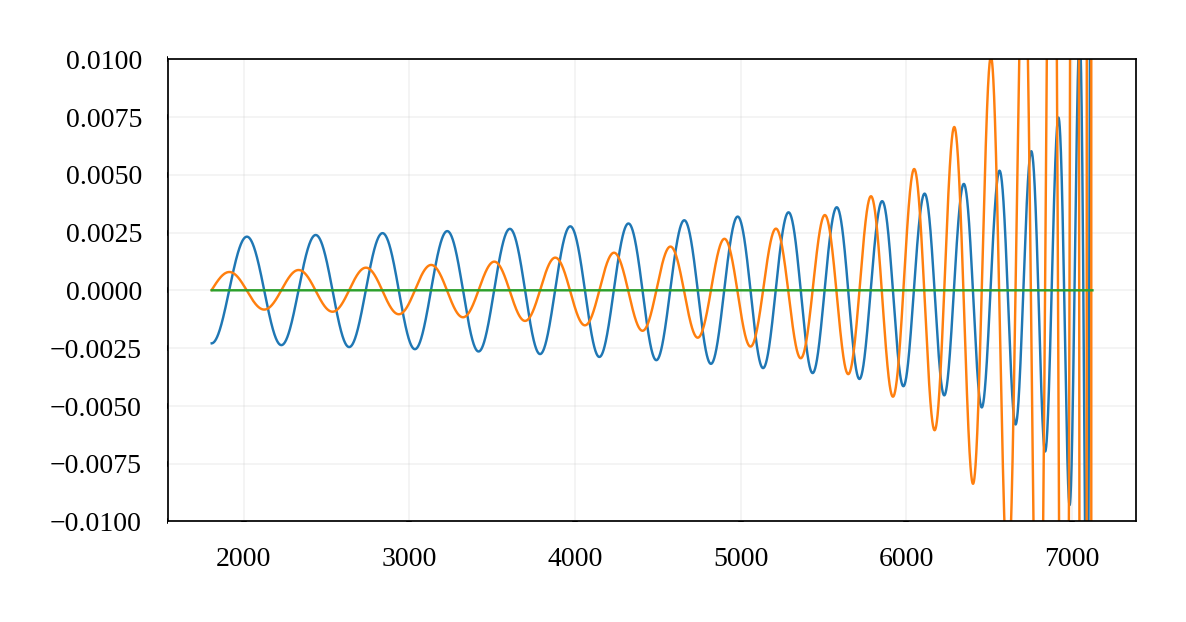

In [52]:
plt.plot(t, h_21.imag)
# plt.plot(t_new, h_new.data[:,h.index(2,1)])
plt.plot(t, 1.e5 * Pdot_comp.imag)
plt.plot(t, np.zeros(t.shape))
plt.ylim(-1.e-2, 1.e-2)
plt.show()

In [37]:
angle_2pi = lambda θ: np.where(θ > 0, θ, θ + 2*np.pi)

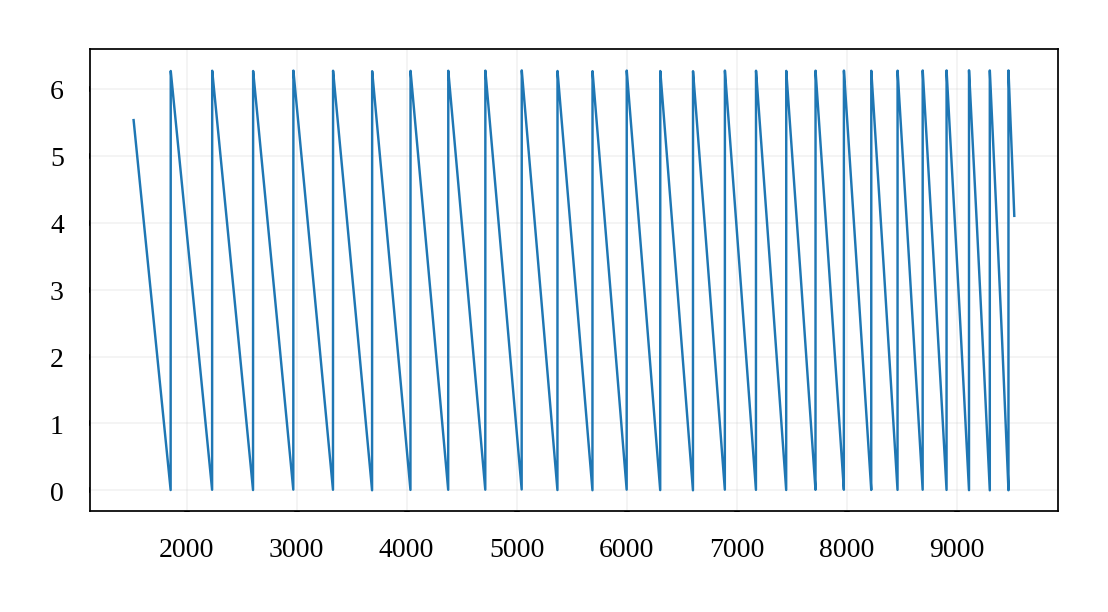

In [418]:
plt.plot(t_ext, angle_2pi(np.angle(hext_21)))
plt.show()

In [13]:
h_21 = h_ext.data[:, h_ext.index(2,1)]

In [8]:
G = abd_start.bondi_CoM_charge()/abd_start.bondi_four_momentum()[:,0,None]

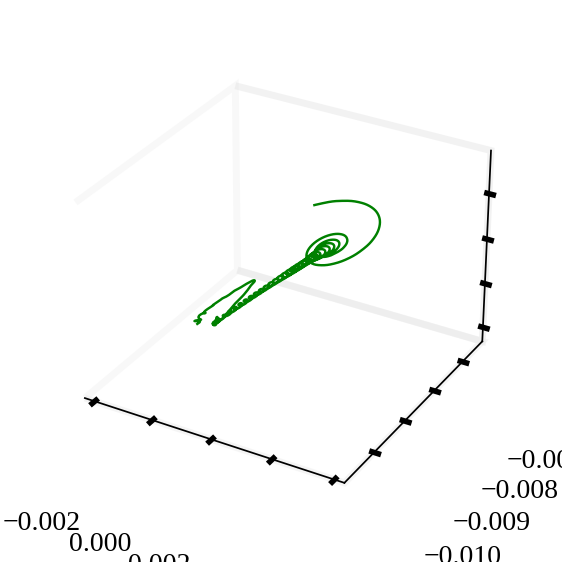

In [17]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

z = abd_start.t
x = G[:,0]
y = G[:,1]

ax.plot3D(x, y, z, 'green')
ax.grid(False)
ax.set_facecolor("white")
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_visible(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.show()